## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:



# Aviation Risk Analysis: Finding low-risk Aircraft for expansion
**Introduction**
-This project is to expand the business into new industries by diversifying. It will focus on purchasing and operating airplanes for commercial and private enterprises.

- **Business Goal**: Identify aircrafts with the lowest risk for commercial and private use.
- **Dataset**: National Transportation Safety Board(NTSB) aviation accident data(1962-2023)
- **Deliverables**: Non-technical presentation, Jupyter notebook, Github repository, An Interactive dashboard.
**Business Understanding**
Minimizing risks in purchasing airplanes for the aviation division.

**Objectives**

**1.**Identify low-risk aircraft types.

**2.**Understand trends and patterns in Aviation accidents.

**3.**Provide strategic business recommendations.



# Importing Libraries and loading data

- **Pandas** : For data manipulation.
- **numpy**: For numerical operations.
- **matplotlib**: For visualizations.
- **seaborn**: For visualizations.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
Aviation_data = pd.read_csv("C:/Users/HP/Downloads/archive/AviationData.csv", encoding='latin1', low_memory= False)

In [3]:
#show preview top 5 rows
Aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#overview of columns and types
Aviation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# Identify Key Columns

Some useful columns may include:

- Event.Id : Refrence for a specific accident.
- Investigation.Type : Categorizing by type of investigation.
- Accident.Number : Official accident number,often linked to investigation reports.
- Event.Date : Date when accident occured.              
- Location :  Geographic location where accident took place.             
- Country :  Where the accident occured.        
- Injury.Severity : Understanding the impact of accidents.
- Make and Model : Important for identifying potential safety concerns with specific aircraft types.
- Aircraft.damage : The level of damage to the aircraft.       
- Aircraft.Category :Understanding which types of aircraft are more prone to accidents.
- Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured : Analyzing the human impact of accidents.
- Broad.Phase.of.flight : Provide insights into the critical phases of flight that are most risky.
- Purpose.of flight : Identify if certain types of flights are more prone to accidents. 
- Report.Status : Status of the accident report.
- Weather.Condition : Condition at the time of the accident.

# Data Cleaning

In [5]:
# checking for missing values 
missing_values = Aviation_data.isnull().sum()

In [6]:
missing_values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [7]:
# checking percentage of missing values
missing_values_percentage = (missing_values / len(Aviation_data)) *100
print('Missing values (%):\n', missing_values_percentage)

Missing values (%):
 Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather

In [8]:
# finding duplicates 
duplicates = Aviation_data.duplicated().sum()
duplicates

0

In [9]:
Aviation_data.describe(include='all')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,26,13590,NaN,NaN,NaN,NaN,4,12,17075,2924
top,20001212X19172,Accident,DCA22WA089,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


In [10]:
# dropping columns missing intolerable data 
columns_to_drop = ['Airport.Code', 'Airport.Name', 'Registration.Number', 'Amateur.Built',
                  'Schedule','FAR.Description', 'Latitude', 'Longitude','Publication.Date']
Aviation_data_cleaned = Aviation_data.drop(columns= columns_to_drop)

In [11]:
# check the cleaned dataframe
Aviation_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81812 non-null  object 
 13  Purpose.of.flight       82697 non-null  object 
 14  Air.carrier             16648 non-null

In [12]:
#convert date columns to datetime
Aviation_data_cleaned['Event.Date'] = pd.to_datetime(Aviation_data['Event.Date'])
#Aviation_data_cleaned['Publication.Date'] = pd.to_datetime(Aviation_data['Publication.Date'])
Aviation_data_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Injury.Severity         87889 non-null  object        
 7   Aircraft.damage         85695 non-null  object        
 8   Aircraft.Category       32287 non-null  object        
 9   Make                    88826 non-null  object        
 10  Model                   88797 non-null  object        
 11  Number.of.Engines       82805 non-null  float64       
 12  Engine.Type             81812 non-null  object

In [13]:
# Fill numerical_columns (Median)
numerical_columns = ['Number.of.Engines','Total.Fatal.Injuries', 'Total.Serious.Injuries',
                     'Total.Minor.Injuries', 'Total.Uninjured']
Aviation_data_cleaned[numerical_columns] = Aviation_data_cleaned[numerical_columns].fillna(Aviation_data_cleaned[numerical_columns].median())


In [14]:
# Verify missing values are filled
Aviation_data_cleaned[numerical_columns].isnull().sum()

Number.of.Engines         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [15]:
# Using mode imputation for columns with categorical columns
categorical_columns =['Country', 'Weather.Condition','Injury.Severity','Aircraft.damage']

for column in categorical_columns:
    mode_value = Aviation_data_cleaned[column].mode()[0]
    Aviation_data_cleaned[column]=Aviation_data_cleaned[column].fillna(mode_value)

In [16]:
Aviation_data_cleaned[categorical_columns].isnull().sum()

Country              0
Weather.Condition    0
Injury.Severity      0
Aircraft.damage      0
dtype: int64

In [17]:
Aviation_data_cleaned.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines             0
Engine.Type                7077
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64

In [18]:
# Fill missing values with 'unknown' for categorical
categorical_col = ['Location','Aircraft.Category','Make','Model','Engine.Type',
                  'Purpose.of.flight', 'Air.carrier', 'Broad.phase.of.flight','Report.Status']
Aviation_data_cleaned[categorical_col]=Aviation_data_cleaned[categorical_col].fillna('UNKNOWN')

In [19]:
#Aviation_data_cleaned['Air.carrier'] = Aviation_data_cleaned['Air.carrier'].str.lower().str

In [20]:
#replace dots with underscores
Aviation_data_cleaned.columns = Aviation_data_cleaned.columns.str.replace('.', '_', regex=True)

In [21]:
Aviation_data_cleaned.isnull().sum()

Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_damage           0
Aircraft_Category         0
Make                      0
Model                     0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Air_carrier               0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_phase_of_flight     0
Report_Status             0
dtype: int64

# Data Analysis
**Feature Engineering**
- Extracting useful components from dates



In [22]:
#Extracting year, month, and day of the weeek
Aviation_data_cleaned['year'] = Aviation_data_cleaned['Event_Date'].dt.year
Aviation_data_cleaned['month'] = Aviation_data_cleaned['Event_Date'].dt.month
Aviation_data_cleaned['day_of_week'] = Aviation_data_cleaned['Event_Date'].dt.day_name()

Aviation_data_cleaned[['Event_Date', 'year','month', 'day_of_week']]

,Event_Date,year,month,day_of_week
0,1948-10-24,1948,10,Sunday
1,1962-07-19,1962,7,Thursday
2,1974-08-30,1974,8,Friday
3,1977-06-19,1977,6,Sunday
4,1979-08-02,1979,8,Thursday
...,...,...,...,...
88884,2022-12-26,2022,12,Monday
88885,2022-12-26,2022,12,Monday
88886,2022-12-26,2022,12,Monday
88887,2022-12-26,2022,12,Monday


# Exploratory Data Analysis(EDA)



**Accidents by Year**

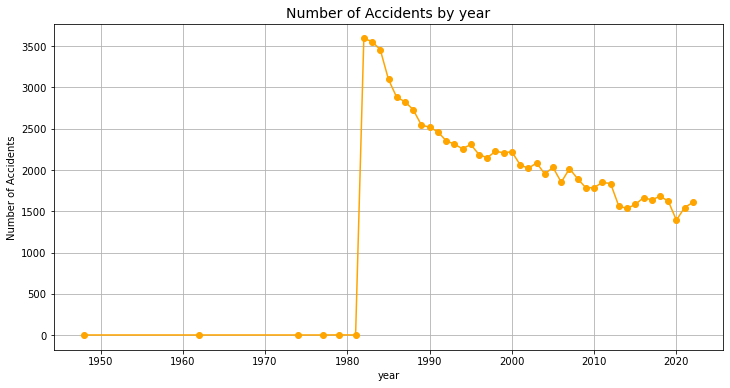

In [23]:
# Counting accidents per year
accidents_per_year = Aviation_data_cleaned.groupby('year')['Accident_Number'].count()

# line plot
plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='orange')
plt.title('Number of Accidents by year', fontsize =14)
plt.xlabel('year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()

In [24]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

**Monthly Accident Trends**


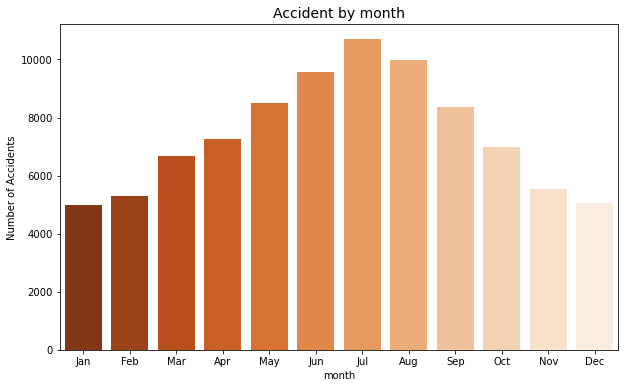

In [25]:
# accidents by month
accidents_per_month = Aviation_data_cleaned.groupby('month')['Accident_Number'].count()
#Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x =accidents_per_month.index, y = accidents_per_month.values, palette = 'Oranges_r')
plt.title('Accident by month',fontsize=14)
plt.xlabel('month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

**Day of the Week Analysis**

Text(0, 0.5, 'Number of Accidents')

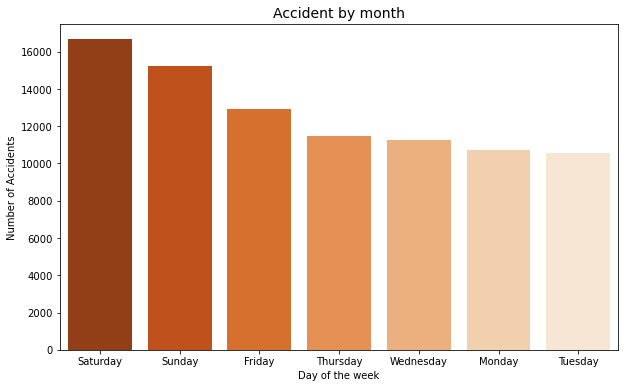

In [26]:
# Accidents by day of the week
accidents_by_day = Aviation_data_cleaned['day_of_week'].value_counts()
#Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x =accidents_by_day.index, y = accidents_by_day.values, palette = 'Oranges_r')
plt.title('Accident by month',fontsize=14)
plt.xlabel('Day of the week')
plt.ylabel('Number of Accidents')


**Weather Conditions**

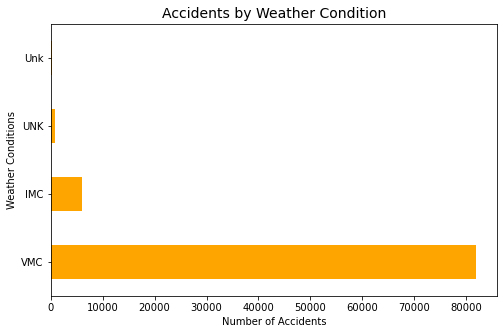

In [27]:
weather_conditions = Aviation_data_cleaned['Weather_Condition'].value_counts()
# Horizontal Bar plot
plt.figure(figsize=(8,5))
weather_conditions.plot(kind='barh',color='Orange')
plt.title('Accidents by Weather Condition',fontsize=14)
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.show()

**Fatal Injuries by Aircraft Category**

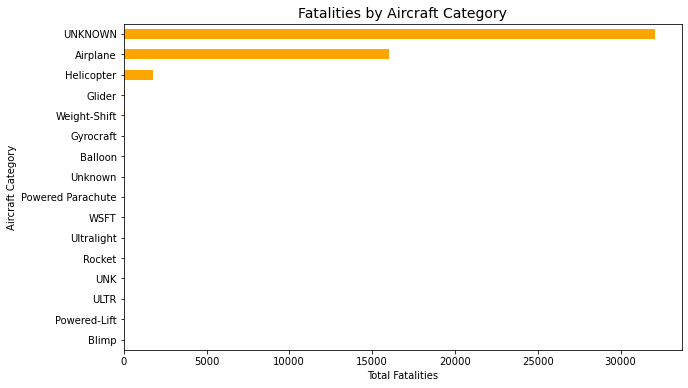

In [28]:
fatalities_by_category = Aviation_data_cleaned.groupby('Aircraft_Category')['Total_Fatal_Injuries'].sum()
# Horizontal Bar plot
plt.figure(figsize=(10,6))
fatalities_by_category.sort_values(ascending=True).plot(kind='barh', color= 'Orange')
plt.title('Fatalities by Aircraft Category',fontsize=14)
plt.xlabel('Total Fatalities')
plt.ylabel('Aircraft Category')
plt.show()

**Accidents by Broad Phase of Flight**


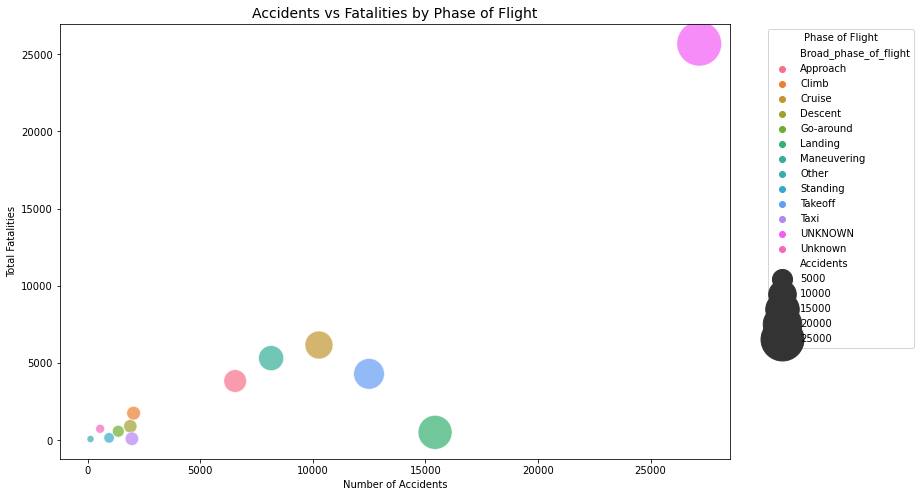

In [29]:
bubble_data = Aviation_data_cleaned.groupby('Broad_phase_of_flight').agg(
    Accidents=('Accident_Number', 'count'),
    Fatalities=('Total_Fatal_Injuries', 'sum')
).reset_index()

# Bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Accidents', 
    y='Fatalities', 
    size='Accidents', 
    hue='Broad_phase_of_flight', 
    data=bubble_data, 
    sizes=(50, 2000), 
    alpha=0.7,
)
plt.title('Accidents vs Fatalities by Phase of Flight', fontsize=14)
plt.xlabel('Number of Accidents')
plt.ylabel('Total Fatalities')
plt.legend(title='Phase of Flight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Top Countries by Accident 

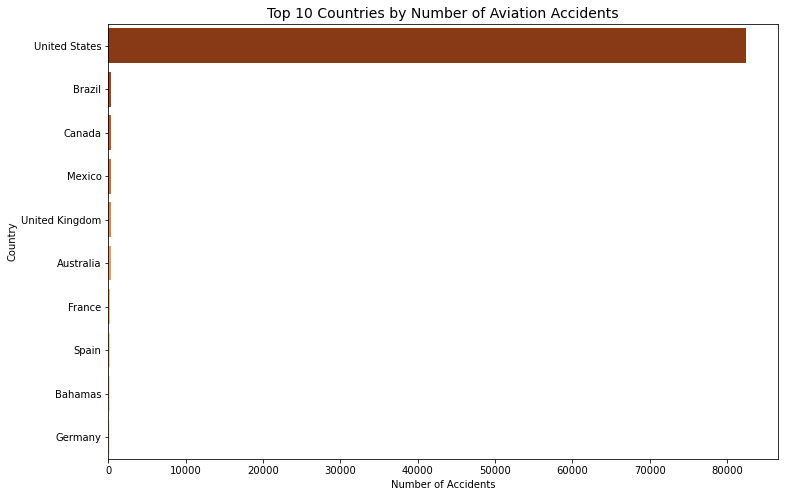

In [30]:
# Top 10 countries by accident count
top_countries = Aviation_data_cleaned['Country'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Oranges_r')
plt.title('Top 10 Countries by Number of Aviation Accidents', fontsize=14)
plt.xlabel('Number of Accidents')
plt.ylabel('Country')
plt.show()

In [31]:
# saving cleaned file 
cleaned_data_file = "cleaned_aviation_data.csv"
Aviation_data_cleaned.to_csv(cleaned_data_file, index=False)

print(f"Cleaned data saved to {cleaned_data_file}")

Cleaned data saved to cleaned_aviation_data.csv


# Conclusion

**Key Recommendations:**
1. Aircraft types with the lowest accident rates.
2. Patterns in accident causes to avoid.
3. Insights into safe locations and operating conditions.

